# Tensorflow version using all libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
import numpy as np
from matplotlib.colors import ListedColormap
import cv2

In [53]:
def plot_decision_boundary_categorical(model, X, y, resolution=0.02):
    # Define the color maps
    markers = ('s', 'x', 'o', '^', 'v', '+', 'p', 'd', 'h', '8', '<', '>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'pink', 'purple', 'brown', 'black', 'yellow', 'green')
    cmap = ListedColormap(colors[:len(np.unique(np.argmax(y, axis=1)))])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid)
    
    Z = np.argmax(Z, axis=1)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot the data points
    for idx, cl in enumerate(np.unique(np.argmax(y, axis=1))):
        plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0], 
                    y=X[np.argmax(y, axis=1) == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    plt.legend()

    plt.show()

# Blobs

((240, 7),
 (240, 2),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([-5.08386668, 10.26337499]))

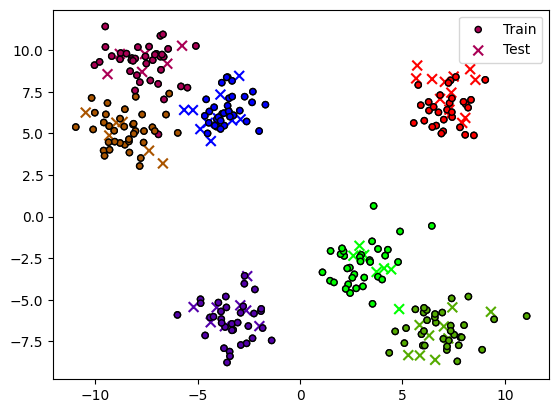

In [69]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Generate dataset with 5 classes
n_samples = 300
n_features = 2
n_classes = 7

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_classes, cluster_std=1.1, random_state=76)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.brg, marker='x', s=50, label='Test')
plt.legend()

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolor='k', s=20)

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))


y_train.shape, X_train.shape, y_train[0], X_train[0]

In [71]:
mlp_n_class = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

mlp_n_class.compile(optimizer="sgd",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = mlp_n_class.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/80
24/24 [==============================] - 1s 16ms/step - loss: 2.3816 - accuracy: 0.1500 - val_loss: 1.7785 - val_accuracy: 0.2167
Epoch 2/80
24/24 [==============================] - 0s 6ms/step - loss: 1.6767 - accuracy: 0.3542 - val_loss: 1.4253 - val_accuracy: 0.4667
Epoch 3/80
24/24 [==============================] - 0s 5ms/step - loss: 1.4472 - accuracy: 0.4125 - val_loss: 1.2437 - val_accuracy: 0.4667
Epoch 4/80
24/24 [==============================] - 0s 7ms/step - loss: 1.2798 - accuracy: 0.5208 - val_loss: 1.0867 - val_accuracy: 0.6833
Epoch 5/80
24/24 [==============================] - 0s 4ms/step - loss: 1.1140 - accuracy: 0.6833 - val_loss: 0.9668 - val_accuracy: 0.7000
Epoch 6/80
24/24 [==============================] - 0s 3ms/step - loss: 0.9566 - accuracy: 0.6958 - val_loss: 0.8199 - val_accuracy: 0.7333
Epoch 7/80
24/24 [==============================] - 0s 3ms/step - loss: 0.8182 - accuracy: 0.7500 - val_loss: 0.7207 - val_accuracy: 0.7167
Epoch 8/80
24/24 [=

358/358 [==============================] - 1s 2ms/step


C:\Users\ferra\AppData\Local\Temp\ipykernel_24208\2308185519.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0],
C:\Users\ferra\AppData\Local\Temp\ipykernel_24208\2308185519.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[np.argmax(y, axis=1) == cl, 0],


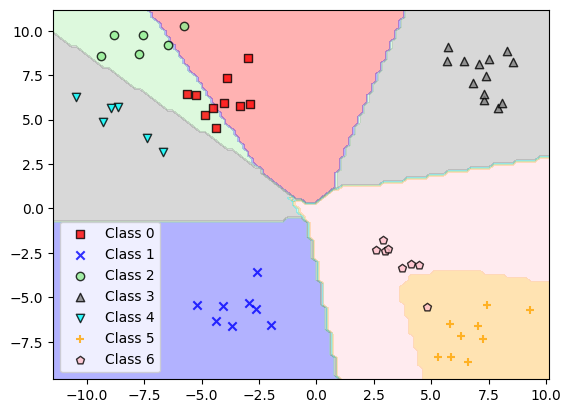

In [72]:
plot_decision_boundary_categorical(mlp_n_class, X_test, y_test, 0.2)

In [73]:
mlp_n_class.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.8833


[0.2792874872684479, 0.8833333253860474]

# MNIST

In [42]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

partition = 1
train_images = train_images[:int(len(train_images) * partition)]
train_labels = train_labels[:int(len(train_labels) * partition)]

# # Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


test_images.shape, train_images.shape

((10000, 28, 28), (60000, 28, 28))

In [41]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1
    
# )

# train_generator = datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels)
# model.fit(train_generator, epochs=10)

In [43]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6086 - accuracy: 0.8381
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2919 - accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2417 - accuracy: 0.9308
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9400
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1866 - accuracy: 0.9460
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1673 - accuracy: 0.9513
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1513 - accuracy: 0.9559
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1374 - accuracy: 0.9601
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1260 - accuracy: 0.9635
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.115

In [5]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 909us/step - loss: 0.0789 - accuracy: 0.9746


[0.07889404892921448, 0.9746000170707703]

In [10]:
# plt.plot(model['accuracy'], label='accuracy')

TypeError: 'Sequential' object is not subscriptable

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9746
Test accuracy: 0.9746
Test loss: 0.0789


313/313 [==============================] - 0s 1ms/step


Text(113.9222222222222, 0.5, 'True labels')

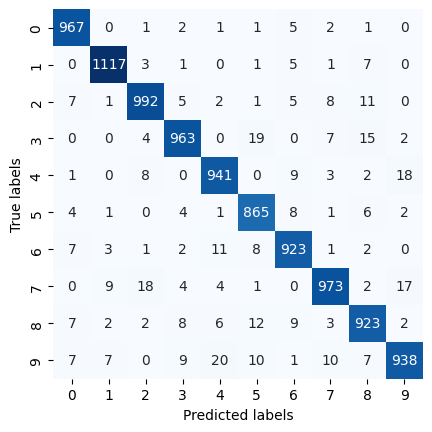

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

1/1 [==============================] - 0s 14ms/step


9

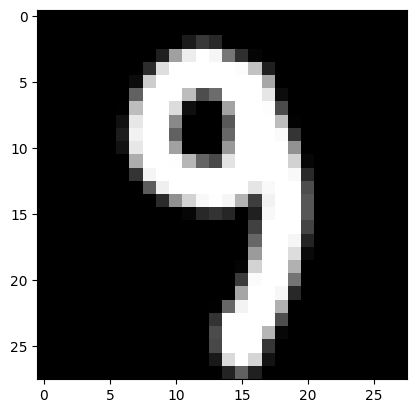

In [28]:
img = cv2.imread('drawing.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

img = img / 255.0

img = img.reshape(1, 28, 28)

np.argmax(model.predict(img))